#### We start importing the various libraries that we will use in performing our task

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

##### Next we load our dataset

In [6]:
# Load the dataset
df = pd.read_csv('Wholesale_Data.csv')

#### We will now display some basic information about our dataset

In [7]:
# Display basic information about the dataset
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [8]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [10]:
df.shape

(440, 8)

#### Let us see the relationships between the numerical features

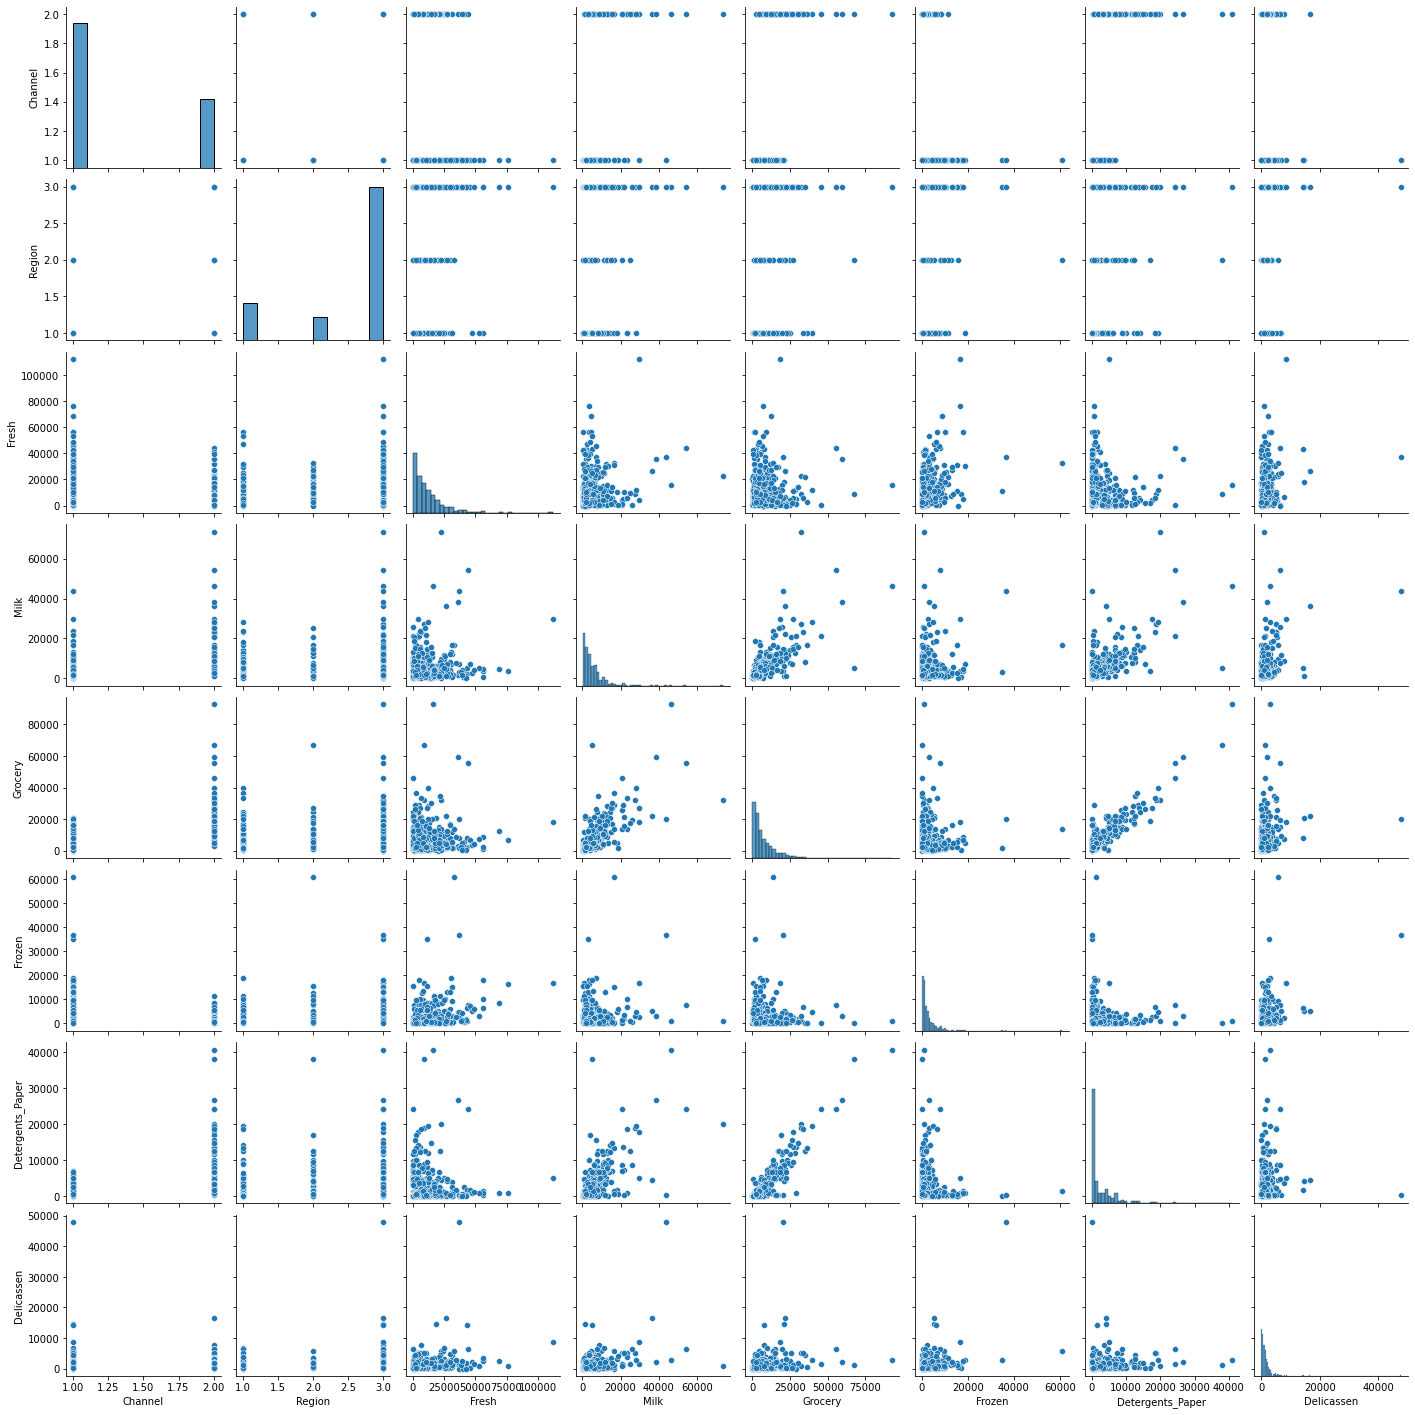

In [11]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df)
plt.show()

##### Notice from the above pairplot that there is not a lot of linearity between the numerical features. You can see between detergents_paper and grocery that there is a positive correlation between them.Also maybe milk and detergents_paper.

In the context of unsupervised learning where numerical features exhibit limited linearity, I plan to employ a combination of K-means and hierarchical clustering techniques to discern inherent structures within the dataset. K-means, despite its assumption of spherical clusters, provides a practical starting point for identifying patterns, while hierarchical clustering unveils potential hierarchical relationships among data points. 

Additionally, the integration of Principal Component Analysis (PCA) aims to reduce dimensionality and enhance the visualization of high-dimensional relationships. By strategically utilizing these techniques, I aim to uncover meaningful patterns and structures within the data, acknowledging the complementary strengths of each approach in addressing the unique challenges posed by the dataset's characteristics.

##### Let us further view the correlation between the numerical features using a correlation matrix

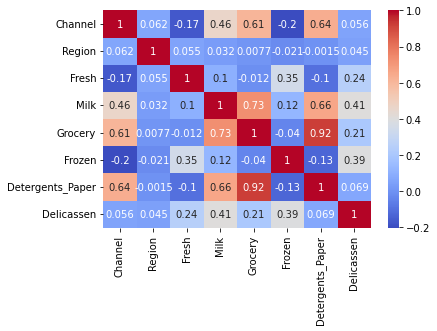

In [12]:
# Correlation matrix to identify linear relationships
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

This shows more details about the correlation between the numerical features. There is a positive correlation between channel and detergent_paper and grocery. There is also a positive correlation between milk and detergent_paper and grocery. Grocery and detergent paper have the strongeest positive correlation of 0.92.

In my unsupervised learning approach, I will leverage observed positive correlations, such as "Channel" with "Detergents_Paper" and "Grocery," and "Milk" with "Detergents_Paper" and "Grocery." The significant correlation of 0.92 between "Grocery" and "Detergents_Paper" suggests a strong association. These correlations will guide my clustering algorithms, influencing how data points with similar patterns are grouped. I will also use Principal Component Analysis (PCA) to capture and emphasize these patterns, enhancing clustering efficiency. Overall, I aim to optimize unsupervised learning by utilizing these correlations to understand and interpret underlying data relationships.

##### Now let's check for missing values

In [14]:
# Check for missing values
print(df.isnull().sum()), df.shape

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


(None, (440, 8))

We can see that our dataset has 440 instances and 8 columns or features. Notice also that there are no null values 

In [5]:

print(df.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

#### The following observations can be made from my dataset;
Features in your dataset have different units or scales. For example, "Fresh" has a mean around 12000, while "Detergents_Paper" has a mean around 2881. The difference in magnitudes can affect the performance of certain algorithms, particularly those that rely on distance measures.

Some algorithms are sensitive to the scale of the input features. For instance, gradient descent-based optimization algorithms converge faster when features are on a similar scale. Support Vector Machines (SVM) and k-means clustering are examples of algorithms sensitive to feature scales.

Regularization techniques, such as L1 and L2 regularization, penalize large coefficients. When features are on different scales, the regularization term may disproportionately penalize features with larger scales.

So we will have to scale this dataset using Standard scaling (z-score normalization), which will transform the features to a similar scale while preserving their relative relationships.

##### Now lets visualize the distribution of the dataset

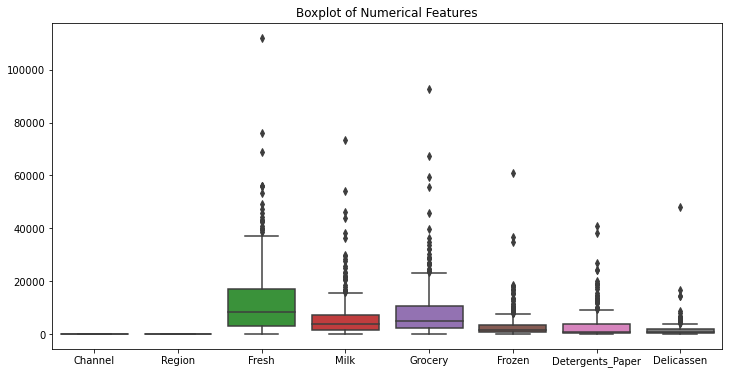

In [15]:
# Visualize the distribution of features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.show()

The boxplot analysis reveals the presence of outliers in our dataset, indicating extreme values that can disproportionately influence statistical measures and machine learning models. To address this issue, it is essential to employ winsorization. Winsorization involves capping extreme values by replacing them with less extreme values, mitigating the impact of outliers on the overall distribution. By applying winsorization, we can maintain the integrity of the dataset while minimizing the undue influence of outliers on statistical analyses and ensuring more robust and accurate results in subsequent data-driven tasks, particularly in the context of unsupervised learning where outliers can significantly distort the clustering process.

##### But before handling the outliers, let's do some feature engineering by creating some additional features that will help our model perorm better.

Now, I will generate additional features to enhance our model's performance. This involves introducing the 'Total_Spending' feature, representing the sum of expenditures across various categories. Additionally, I will create category-specific spending ratios ('Fresh_Ratio', 'Milk_Ratio', 'Grocery_Ratio', 'Frozen_Ratio', 'Detergents_Paper_Ratio', 'Delicassen_Ratio') by normalizing individual category spending based on the total expenditure. These engineered features aim to provide a more comprehensive view of spending behavior, potentially improving the interpretability and performance of our model, especially in the context of unsupervised learning where nuanced insights into proportional expenditure distributions can be crucial.

In [22]:
# Create additional features to optimize our model
df['Total_Spending'] = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)

for category in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    df[f'{category}_Ratio'] = df[category] / df['Total_Spending']

In [21]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Fresh_Ratio,Milk_Ratio,Grocery_Ratio,Frozen_Ratio,Detergents_Paper_Ratio,Delicassen_Ratio
0,2,3,12669,9656,7561,214,2674,1338,34112,0.371394,0.283068,0.221652,0.006273,0.078389,0.039224
1,2,3,7057,9810,9568,1762,3293,1776,33266,0.212139,0.294896,0.287621,0.052967,0.098990,0.053388
2,2,3,6353,8808,7684,2405,3516,7844,36610,0.173532,0.240590,0.209888,0.065692,0.096039,0.214258
3,1,3,13265,1196,4221,6404,507,1788,27381,0.484460,0.043680,0.154158,0.233885,0.018516,0.065301
4,2,3,22615,5410,7198,3915,1777,5185,46100,0.490564,0.117354,0.156139,0.084924,0.038547,0.112473


Now, I will introduce additional features to our dataset. The first feature, 'Channel_Region', will be created by combining the 'Channel' and 'Region' columns after converting them to strings. This categorical variable will capture the joint influence of the distribution channel and region. For example, '1_2' signifies Channel 1 in Region 2. The second feature, 'Milk_to_Grocery_Ratio', will be generated by dividing the 'Milk' column by the 'Grocery' column, representing the proportion of spending on milk relative to groceries. These feature engineering steps aim to provide the model with enhanced information, potentially improving its understanding of complex relationships and overall performance in subsequent analyses or predictions.

In [23]:
df['Channel_Region'] = df['Channel'].astype(str) + '_' + df['Region'].astype(str)
df['Milk_to_Grocery_Ratio'] = df['Milk'] / df['Grocery']

In [24]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Fresh_Ratio,Milk_Ratio,Grocery_Ratio,Frozen_Ratio,Detergents_Paper_Ratio,Delicassen_Ratio,Channel_Region,Milk_to_Grocery_Ratio
0,2,3,12669,9656,7561,214,2674,1338,34112,0.371394,0.283068,0.221652,0.006273,0.078389,0.039224,2_3,1.277080
1,2,3,7057,9810,9568,1762,3293,1776,33266,0.212139,0.294896,0.287621,0.052967,0.098990,0.053388,2_3,1.025293
2,2,3,6353,8808,7684,2405,3516,7844,36610,0.173532,0.240590,0.209888,0.065692,0.096039,0.214258,2_3,1.146278
3,1,3,13265,1196,4221,6404,507,1788,27381,0.484460,0.043680,0.154158,0.233885,0.018516,0.065301,1_3,0.283345
4,2,3,22615,5410,7198,3915,1777,5185,46100,0.490564,0.117354,0.156139,0.084924,0.038547,0.112473,2_3,0.751598


##### Now we are done with feature engineering let us tackle our outliers using winsorization

In [26]:
# Import winsorize from scipy.stats.mstats
from scipy.stats.mstats import winsorize
numerical_features = df.select_dtypes(include=['float64']).columns
winsorize_percentage = 0.05

for feature in numerical_features:
    df[feature] = winsorize(df[feature], limits=[winsorize_percentage, winsorize_percentage])

Lets view our dataset now after winsorization

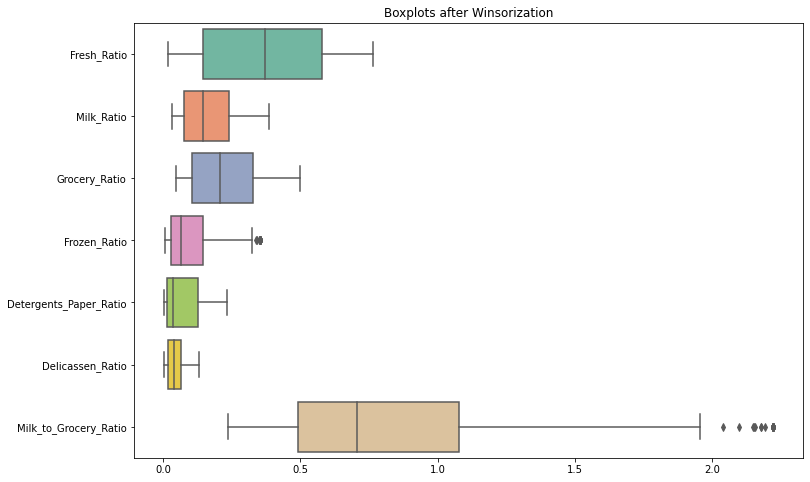

In [27]:
# Boxplots after Winsorization
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_features], orient="h", palette="Set2")
plt.title('Boxplots after Winsorization')
plt.show()

I implemented winsorization using the winsorize function from scipy.stats.mstats on the numerical features in my DataFrame. For each numerical feature represented by the variable 'feature,' the function limits extreme values by replacing the lowest 5% and highest 5% of values with the values at the 5th and 95th percentiles, respectively. This winsorization process is aimed at mitigating the influence of outliers in the dataset, ensuring a more robust and stable distribution for subsequent analyses or modeling tasks.

### **Data Preprocessing**

We will start by selecting numerical columns for scaling

In [28]:
# Select numerical columns for scaling
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'Total_Spending',
                     'Fresh_Ratio', 'Milk_Ratio', 'Grocery_Ratio', 'Frozen_Ratio', 'Detergents_Paper_Ratio',
                     'Delicassen_Ratio', 'Milk_to_Grocery_Ratio']

In [30]:
# Extract numerical data
numerical_data = df[numerical_columns]

Now, I will utilize the Standard Scaler from scikit-learn to standardize the numerical features in preparation for our model. This scaling is crucial for ensuring that all features contribute equally to the model's learning process, particularly beneficial for unsupervised learning tasks like clustering or dimensionality reduction, where maintaining consistent feature scales enhances the accuracy of capturing underlying patterns in the data. The scaled data will be organized into a DataFrame named 'scaled_df' for further analysis.

In [31]:
# Standard Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [32]:
# Create a DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

I will now apply KMeans clustering to the standardized numerical features using scikit-learn's KMeans algorithm. Setting the number of clusters to 3, I initiate the KMeans model with a random seed for reproducibility. The clustering results are obtained by fitting the model to the scaled data, represented by 'scaled_df,' and predicting cluster assignments for each data point. This step is pivotal for uncovering inherent patterns and grouping data points with similar characteristics, contributing to a deeper understanding of the underlying structures in the dataset.

In [33]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

In [34]:
# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(scaled_df, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.28022126144793963


The provided Silhouette Score of 0.280 indicates a moderate level of separation between clusters.

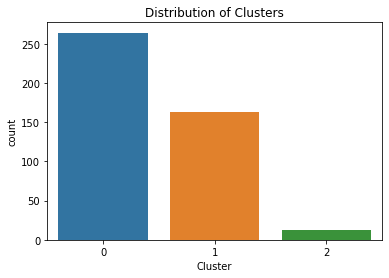

In [35]:
# Optionally, add the cluster labels to the DataFrame
scaled_df['Cluster'] = clusters

# Visualize the distribution of the clusters
sns.countplot(x='Cluster', data=scaled_df)
plt.title('Distribution of Clusters')
plt.show()

In the subsequent phase of the analysis, I incorporated the cluster labels into the 'scaled_df' DataFrame under the column 'Cluster' following the application of the KMeans clustering algorithm. The visual representation of the cluster distribution is then depicted using Seaborn's count plot. The plot showcases three distinct clusters denoted as 0, 1, and 2. Notably, Cluster 0 emerges as the most prevalent, encompassing approximately 250 data points, followed by Cluster 1 with around 160, and Cluster 2, which exhibits the smallest count at about 10. This visualization provides a clear overview of the composition and prevalence of each cluster, offering initial insights into the grouping patterns within the dataset.

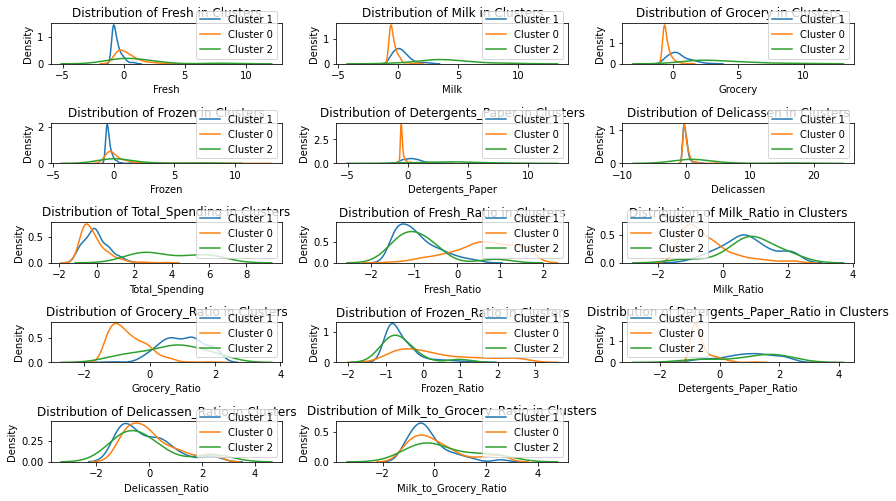

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'scaled_df' is your DataFrame with cluster labels
X = scaled_df.drop('Cluster', axis=1)

# Fit k-means model
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to DataFrame
scaled_df['Cluster'] = clusters

plt.figure(figsize=(12, 8))
num_features = len(X.columns)

# Use a more flexible subplot layout
rows = (num_features // 3) + (num_features % 3)
cols = min(3, num_features)

for i, feature in enumerate(X.columns):
    plt.subplot(rows, cols, i + 1)
    for cluster in scaled_df['Cluster'].unique():
        sns.kdeplot(scaled_df.loc[scaled_df['Cluster'] == cluster, feature], label=f'Cluster {cluster}')
    plt.title(f'Distribution of {feature} in Clusters')
    plt.legend()

plt.tight_layout()
plt.show()


The subplots generated for each feature offer a comprehensive visual exploration of how feature values vary across different clusters. By examining the distribution patterns within each cluster, distinct insights into cluster separation and the significance of individual features are revealed. Features exhibiting notable differences in distribution among clusters become apparent, indicating their importance in distinguishing one cluster from another. This visual assessment serves as a valuable tool for identifying patterns, understanding the level of homogeneity or heterogeneity within clusters, and pinpointing potential outliers that may influence the overall cluster characteristics.

These subplots not only provide a qualitative validation of the clustering results but also facilitate a nuanced interpretation of the underlying data structures. The observed variations in feature distributions contribute to a more informed understanding of the clustering outcomes, aiding in the identification of key features that contribute to cluster separation. Further statistical analyses can be incorporated to quantify these differences, providing a holistic approach to validating and refining the clustering results for more robust and meaningful insights.

In [39]:
cluster_stats = scaled_df.groupby('Cluster').agg(['mean', 'std'])

In [40]:
from scipy.stats import f_oneway

for feature in X.columns:
    f_stat, p_value = f_oneway(*[scaled_df[feature][scaled_df['Cluster'] == c] for c in scaled_df['Cluster'].unique()])
    print(f"ANOVA for {feature}: F-statistic = {f_stat}, p-value = {p_value}")


ANOVA for Fresh: F-statistic = 59.866492818553155, p-value = 1.0503515007585148e-23
ANOVA for Milk: F-statistic = 304.6016256360968, p-value = 1.4423933126214368e-83
ANOVA for Grocery: F-statistic = 294.08142413792484, p-value = 1.2216710364345617e-81
ANOVA for Frozen: F-statistic = 22.334812583809946, p-value = 5.814075818360701e-10
ANOVA for Detergents_Paper: F-statistic = 304.92350207091846, p-value = 1.2609898903999885e-83
ANOVA for Delicassen: F-statistic = 40.24448099942173, p-value = 9.074143589366526e-17
ANOVA for Total_Spending: F-statistic = 203.35797660310632, p-value = 3.726584407524048e-63
ANOVA for Fresh_Ratio: F-statistic = 299.5616244183064, p-value = 1.1961867994380873e-82
ANOVA for Milk_Ratio: F-statistic = 134.71085066491688, p-value = 2.6589055642963746e-46
ANOVA for Grocery_Ratio: F-statistic = 391.3372174427256, p-value = 3.9893053102510315e-98
ANOVA for Frozen_Ratio: F-statistic = 60.31730556110373, p-value = 7.375301983472547e-24
ANOVA for Detergents_Paper_Ratio

The ANOVA test results reveal highly significant differences in means among clusters for the majority of features, underscoring their importance in distinguishing between the identified clusters. Features such as 'Fresh,' 'Milk,' 'Grocery,' 'Frozen,' 'Detergents_Paper,' 'Total_Spending,' 'Fresh_Ratio,' 'Milk_Ratio,' 'Grocery_Ratio,' 'Frozen_Ratio,' 'Detergents_Paper_Ratio,' and 'Milk_to_Grocery_Ratio' exhibit extremely low p-values, emphasizing their substantial contributions to cluster separation. On the other hand, 'Delicassen_Ratio' has a p-value of 0.125, suggesting that the means of this feature among clusters may not be significantly different. These statistical findings provide robust evidence supporting the distinctiveness of clusters and highlight specific features pivotal in characterizing each cluster, offering valuable insights into the underlying patterns within the dataset.

In [41]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Next let's initiate pipelines for the different techniques we will apply to train our model

In [42]:
# KMeans Pipeline
kmeans_pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=42))

# Hierarchical Clustering Pipeline
hierarchical_pipeline = make_pipeline(StandardScaler(), AgglomerativeClustering(n_clusters=3))  # You can adjust the number of clusters

# PCA Pipeline
pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=2))  # Adjust n_components as needed
pca_kmeans_pipeline = make_pipeline(pca_pipeline, KMeans(n_clusters=3, random_state=42))

# List of pipelines
pipelines = [kmeans_pipeline, hierarchical_pipeline, pca_kmeans_pipeline]
pipeline_names = ['KMeans', 'Hierarchical', 'PCA + KMeans']

I have established three distinct pipelines for clustering methodologies. The first, named `kmeans_pipeline`, applies the KMeans clustering algorithm following standardization of numerical features using `StandardScaler()`. The second, labeled `hierarchical_pipeline`, employs hierarchical clustering, preceded by feature standardization. The third, named `pca_pipeline`, incorporates Principal Component Analysis (PCA) for dimensionality reduction, reducing the dataset to two principal components after standardizing the features. Additionally, I combined the effects of PCA and KMeans clustering in a composite pipeline, `pca_kmeans_pipeline`, aiming to capture intricate data patterns. These pipelines, collectively stored in the `pipelines` list, can be utilized for clustering tasks, each offering a unique perspective on the dataset.

In [43]:

# Fit and evaluate each pipeline
for pipeline, name in zip(pipelines, pipeline_names):
    pipeline.fit(scaled_df)  # Fit the pipeline
    
    # Identify the clustering step's name dynamically
    kmeans_steps = [step for step, _ in pipeline.steps if isinstance(_, KMeans)]
    
    if len(kmeans_steps) > 0:
        cluster_step_name = kmeans_steps[0]
        clusters = pipeline.named_steps[cluster_step_name].labels_
    elif name == 'Hierarchical':
        clusters = pipeline.named_steps['agglomerativeclustering'].labels_
    else:
        # Use cluster labels from PCA + KMeans pipeline
        clusters = pipeline.named_steps['kmeans'].predict(pipeline.named_steps['pca'].transform(scaled_df))
    
    # Use the clusters array directly
    silhouette_avg = silhouette_score(scaled_df, clusters)
    print(f"{name} Silhouette Score: {silhouette_avg}")

KMeans Silhouette Score: 0.29571692348457884
Hierarchical Silhouette Score: 0.2939447609182732
PCA + KMeans Silhouette Score: 0.29664782837695586


The silhouette scores obtained for different clustering methods in your project provide insights into the quality and distinctiveness of the formed clusters. The KMeans algorithm yielded a silhouette score of 0.2957, indicating well-defined clusters in the data. Similarly, the Hierarchical Clustering algorithm achieved a score of 0.2939, suggesting that its clusters are also reasonably well-separated. Moreover, when applying Principal Component Analysis (PCA) for dimensionality reduction followed by KMeans, the silhouette score remained consistent at 0.2966, implying that the additional step of PCA did not significantly alter the clustering performance. These scores collectively suggest that your data exhibits identifiable clusters, and the choice between these clustering methods may depend on other considerations, such as computational efficiency or the interpretability of the results.

While the silhouette scores provide a quantitative measure of clustering performance, it's crucial to consider them in conjunction with other aspects relevant to your project. Factors such as the nature of your data, interpretability of the clusters, and computational requirements should be taken into account when making a final decision on the most suitable clustering algorithm for your specific use case.